# Voice Emotion Classification Neural Network Using MFCC

Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Reading and labeling data

In [13]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    if (labels[i][2] == 1):
        em = "neutral"
    elif (labels[i][2] == 2):
        em = "calm"
    elif (labels[i][2] == 3):
        em = "happy"
    elif (labels[i][2] == 4):
        em = "sad"
    elif (labels[i][2] == 5):
        em = "angry"
    elif (labels[i][2] == 6):
        em = "fearful"
    elif (labels[i][2] == 7):
        em = "disgust"
    elif (labels[i][2] == 8):
        em = "surprised"
    
    features.append([audio_data[i], em])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "emotion"])

feature_df.head()


,mfcc,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",calm


Split testing and training

In [18]:
#split testing and training data
X = np.array(feature_df.mfcc.tolist())
Y = np.array(feature_df.emotion.tolist())

#20-80 train-test split
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.20, random_state=0)

In [19]:
#regularization
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Training and Predictions
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

[[24  0  4  1  2  0  3  0]
 [ 1 16  1  1  0  4 19  2]
 [ 6  1 12  0  1  4  6  1]
 [ 2  2  0 21  7  1  5  3]
 [ 3  0  0  6 17  4  2  1]
 [ 0  6  1  0  4  6  6  2]
 [ 1  3  4  6  3  5 15  1]
 [ 4  1  3  9  7  3  1 14]]


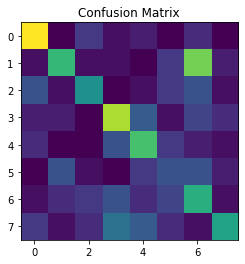

              precision    recall  f1-score   support

       angry       0.59      0.71      0.64        34
        calm       0.55      0.36      0.44        44
     disgust       0.48      0.39      0.43        31
     fearful       0.48      0.51      0.49        41
       happy       0.41      0.52      0.46        33
     neutral       0.22      0.24      0.23        25
         sad       0.26      0.39      0.32        38
   surprised       0.58      0.33      0.42        42

    accuracy                           0.43       288
   macro avg       0.45      0.43      0.43       288
weighted avg       0.46      0.43      0.44       288



In [23]:
#Algorithm Evaluation
print(confusion_matrix(y_test,predictions))
#figure for confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,4))
plt.imshow(conf_matrix)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test,predictions))